In [1]:
!pip install -U imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io
import joblib as jb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import  RobustScaler
from IPython.display import display
from joblib import dump, load
from imblearn.over_sampling import SMOTE


#importo métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

#árboles
from sklearn import tree
from sklearn.tree import plot_tree

#Bosques
from sklearn.ensemble import RandomForestClassifier



#importo las métricas


#Librerias de validacion cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [2]:
df=pd.read_csv('https://github.com/adiacla/bigdata/raw/master/adult.csv.zip')

In [3]:
# URL del archivo ZIP
zip_url = "https://github.com/adiacla/bigdata/raw/master/adult.csv.zip"

# Descargar el archivo ZIP y extraerlo en memoria
response = requests.get(zip_url)
with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
    # Extraer el archivo CSV en memoria
    with zip_ref.open('adult.csv') as csv_file:
        # Leer el archivo CSV en un DataFrame de Pandas
        df = pd.read_csv(csv_file)

# Mostrar las primeras filas del DataFrame
df.head(32560)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
# Contar la cantidad de valores NaN en el DataFrame
total_nan_values = df.isna().sum().sum()

# Imprimir la cantidad total de valores NaN
print("Total de valores NaN en el DataFrame:", total_nan_values)

Total de valores NaN en el DataFrame: 0


In [7]:
# Preprocesamiento y feature engineering
# Tratar los valores faltantes representados por '?'
df = df[(df != '?').all(axis=1)]
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [8]:
# Codificar la variable objetivo 'income' a 0 y 1, definiendo 0 como menor a 50K y 1 como mayor a 50K
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [9]:
# Codificar variables categóricas
label_encoders = {}
for column in df.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,310152,15,10,4,10,1,4,1,0,0,40,38,0
32557,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32558,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32559,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0


In [10]:
# Suponiendo que label_encoders es un diccionario que contiene los LabelEncoders utilizados para codificar las variables categóricas
education_encoder = label_encoders['education']

# Obtenemos los números codificados para las etiquetas originales de 'education'
encoded_numbers = [i for i in range(len(education_encoder.classes_))]

# Invertimos la codificación para obtener las etiquetas originales
original_labels = education_encoder.inverse_transform(encoded_numbers)

# Imprimimos las etiquetas originales junto con sus números codificados
for number, label in zip(encoded_numbers, original_labels):
    print(f"Número codificado: {number}, Etiqueta original: {label}")

Número codificado: 0, Etiqueta original: 10th
Número codificado: 1, Etiqueta original: 11th
Número codificado: 2, Etiqueta original: 12th
Número codificado: 3, Etiqueta original: 1st-4th
Número codificado: 4, Etiqueta original: 5th-6th
Número codificado: 5, Etiqueta original: 7th-8th
Número codificado: 6, Etiqueta original: 9th
Número codificado: 7, Etiqueta original: Assoc-acdm
Número codificado: 8, Etiqueta original: Assoc-voc
Número codificado: 9, Etiqueta original: Bachelors
Número codificado: 10, Etiqueta original: Doctorate
Número codificado: 11, Etiqueta original: HS-grad
Número codificado: 12, Etiqueta original: Masters
Número codificado: 13, Etiqueta original: Preschool
Número codificado: 14, Etiqueta original: Prof-school
Número codificado: 15, Etiqueta original: Some-college


In [11]:
#teniendo en cuenta que las features "education" y "education.num" representan lo mismo, se elimina "education.num"
df.drop('education.num', axis=1, inplace=True)

In [12]:
#las features "fnlwgt" y "relationship" no presentan ningun aporte significativo al modelo, por lo cual se eliminan
df.drop(['fnlwgt','relationship'], axis=1, inplace=True)

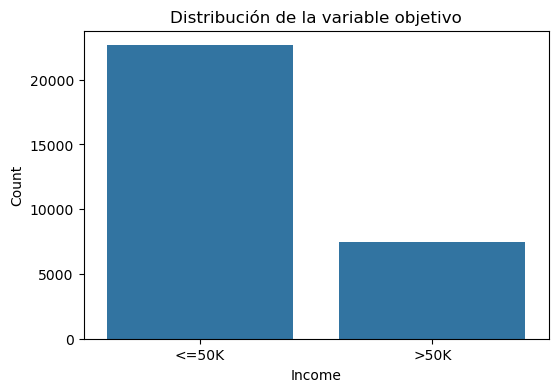

In [13]:
# Visualización de distribución de la variable objetivo 'income'
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df)
plt.title('Distribución de la variable objetivo')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.show()

Como podemos observar en la gráfica, los datos están desbalanceados, por lo cual se realizará un sobremuestreo.

In [14]:
# Dividir los datos en características (features) y etiquetas (labels)
X = df.drop('income', axis=1)
y = df['income']

In [15]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [16]:
# Instanciar el objeto SMOTE para el sobremuestreo
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de datos. Unicamente a los datos de entrenamiento.
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

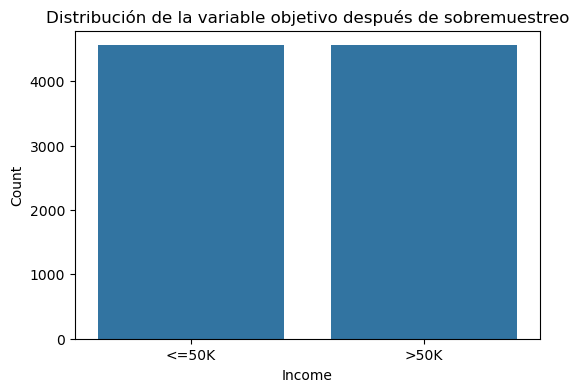

In [65]:
#Representación gráfica de la variable objetivo luego del sobremuestreo 
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=pd.DataFrame({'income': y_train_resampled}))
plt.title('Distribución de la variable objetivo después de sobremuestreo')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.show()

In [17]:
#Modelo Naive Bayes
modelNB= GaussianNB()

#Se entrena mediante los datos de entrenamiento
modelNB.fit(X_train, y_train)


GaussianNB()

In [18]:
# Predecir las etiquetas de los datos de prueba
y_pred_NB = modelNB.predict(X_test)
y_pred_NB

array([1, 0, 0, ..., 0, 0, 0])

In [19]:
# Calcular la exactitud del modelo
modelNB.score(X_test,y_test)

0.788603398259428

In [20]:
# Mostrar el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_NB))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     18096
           1       0.66      0.31      0.42      6034

    accuracy                           0.79     24130
   macro avg       0.73      0.63      0.65     24130
weighted avg       0.77      0.79      0.76     24130



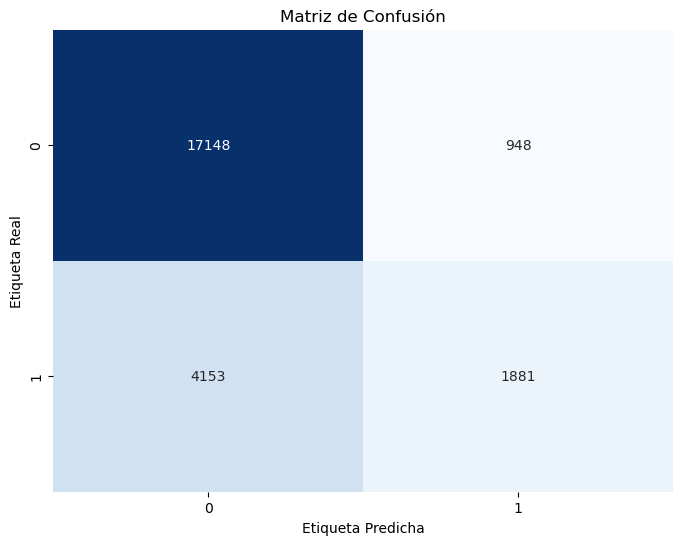

In [21]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_NB)

# Crear un heatmap para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

La matriz de confusión nos muestra que la cantidad de verdaderos negativos y verdaderos positivos fue mayor a la cantidad de falsos negativos y falsos positivos

In [22]:
# Modelo de arboles de decisión
# Definimos la parrilla de parámetros
parametros = ParameterGrid({
    'min_samples_split': [4, 6, 8, 10],
    'max_features': [1, 2, 3, 4],
    'max_depth': [None, 4, 6, 8],
    'criterion': ['gini', 'entropy']
})

# Creamos un diccionario para almacenar los resultados
results = {'pFinal': [], 'treeScore': []}

# Iteramos sobre cada combinación de parámetros
for params in parametros:
    # Se inicializa el árbol de decisión con los parámetros dados
    dt_classifier = DecisionTreeClassifier(**params, random_state=42)
    
    # Se calcula la puntuación del arbol mediante validación cruzada
    tree_score = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    # Almacenamos los resultados en el diccionario de resultados
    results['pFinal'].append(params)
    results['treeScore'].append(tree_score)

# Imprimimos los resultados
for params, score in zip(results['pFinal'], results['treeScore']):
    print("Parámetros:", params)
    print("Puntuación del árbol de decisión:", score)
    print()

Parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_split': 4}
Puntuación del árbol de decisión: 0.7994019133825487

Parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_split': 6}
Puntuación del árbol de decisión: 0.8086884000324256

Parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_split': 8}
Puntuación del árbol de decisión: 0.799902173748765

Parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_split': 10}
Puntuación del árbol de decisión: 0.799237312471061

Parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_split': 4}
Puntuación del árbol de decisión: 0.8133273153701254

Parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_split': 6}
Puntuación del árbol de decisión: 0.8176400516060955

Parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_split': 8}
Puntu

In [23]:
#Listamos los resultados para comparar que parametros se utilizaron para lograr un mayor score, ordenando de mayor a menor
# Convertimos el diccionario de resultados a un DataFrame
results_df = pd.DataFrame(results)

# Dividimos la columna 'pFinal' en columnas separadas
results_df = pd.concat([results_df, results_df['pFinal'].apply(pd.Series)], axis=1)

# Eliminamos la columna 'pFinal' original
results_df = results_df.drop(columns=['pFinal'])

# Ordenamos el DataFrame por la columna 'treeScore' de forma descendente
results_df = results_df.sort_values(by='treeScore', ascending=False)

# Mostramos los primeros 10 resultados
print(results_df.head(10))

     treeScore criterion  max_depth  max_features  min_samples_split
125   0.829908   entropy        8.0             4                  6
7     0.829079      gini        NaN             2                 10
127   0.828912   entropy        8.0             4                 10
60    0.827921      gini        8.0             4                  4
123   0.827255   entropy        8.0             3                 10
74    0.827089   entropy        NaN             3                  8
121   0.826920   entropy        8.0             3                  6
58    0.825593      gini        8.0             3                  8
124   0.825427   entropy        8.0             4                  4
61    0.825268      gini        8.0             4                  6


In [24]:
#Entrenamos un modelo en base al mejor arbol obtenido

#Creamos el arbol con los parametros necesarios
bTree=tree.DecisionTreeClassifier(min_samples_split=6, max_features=4, max_depth=8, criterion='entropy', random_state=42)

In [25]:
#Entrenamos el modelo en base al arbol que creamos
bTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=4,
                       min_samples_split=6, random_state=42)

In [26]:
#Evaluamos el rendimiento del modelo de arbol de decisión en los conjuntos de datos de entrenamiento y prueba
treeScore=bTree.score(X_train, y_train)
print(f'Datos de entrenamiento:',treeScore)
score=bTree.score(X_test, y_test)
print(f'Datos de prueba:', score)

Datos de entrenamiento: 0.84565649867374
Datos de prueba: 0.8301284707832574


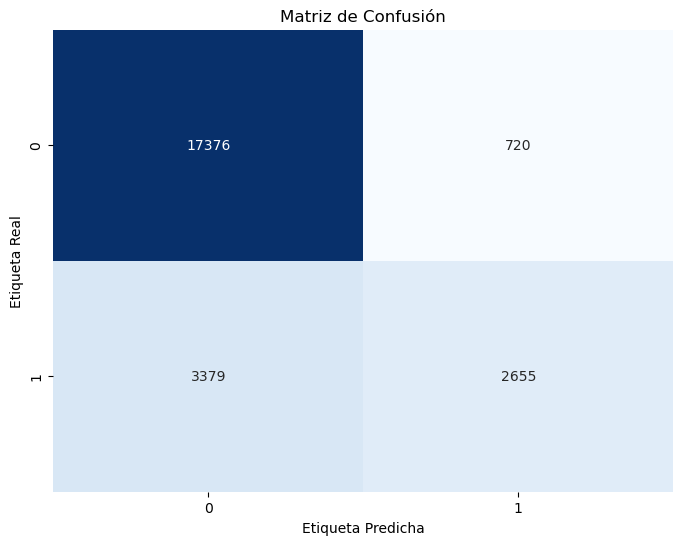

In [27]:
#Matriz de confusión
# Predecimos las etiquetas de los datos de prueba
y_pred_Arbol = bTree.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_Arbol)

# Crear un heatmap para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

Podemos observar mediante la matriz de confusión, y mediante los resultados presentados que el modelo de arbol aleatorio presenta una mayor
precisión y un mejor rendimiento a la hora de realizar las predicciones si lo comparamos con el modelo naive bayes. Sin embargo, el uso de una profundidad (max_depht) de 8 puede llevar a un sobreajuste del modelo, por lo cual para la realización de los siguientes se tomará en cuenta una profundidad menor con el fin de reducir el riesgo de sobreajuste.

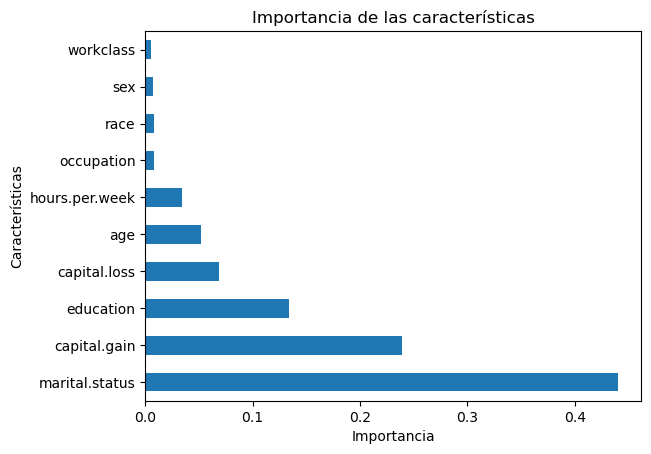

In [28]:
# Importancia de las características
feature_importance = pd.Series(bTree.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [29]:
##MODELO BOSQUE ALEATORIO

In [30]:
#Creamos el bosque con los parametros necesarios y entrenamos el modelo en base al bosque. 
modeloBosque = RandomForestClassifier(n_estimators=20, max_samples=3/4, max_depth=8, oob_score=True, random_state=42)
modeloBosque.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_samples=0.75, n_estimators=20,
                       oob_score=True, random_state=42)

In [31]:
#Realizamos una prediccion sobre el conjunto de datos "X_test"
y_pred_Bosque = modeloBosque.predict(X_test)
y_pred_Bosque

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
#Calcular la exactitud del modelo
modeloBosque.score(X_test,y_test)

0.8366763365105677

In [33]:
# Graficar cada árbol en el bosque aleatorio
# for i, tree_in_forest in enumerate(modeloBosque.estimators_):
#     plt.figure(figsize=(12, 8))
#     plt.title(f"Árbol {i+1} del Bosque Aleatorio")
#     tree.plot_tree(tree_in_forest, filled=True, feature_names=X.columns, class_names=['<=50K', '>50K'])
#     plt.show()

In [34]:
#Calcular la precision del oobscore
scoreBosque=modeloBosque.oob_score_
scoreBosque

0.8393567639257294

In [35]:
accuracy = accuracy_score(y_test, y_pred_Bosque)
print("Precisión del modelo de bosque aleatorio:", accuracy)

Precisión del modelo de bosque aleatorio: 0.8366763365105677


In [36]:
# y_pred_Bosque = modeloBosque.predict(X_test)

In [37]:
# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred_Bosque)
print("Matriz de confusión:")
print(conf_mat)

Matriz de confusión:
[[17665   431]
 [ 3510  2524]]


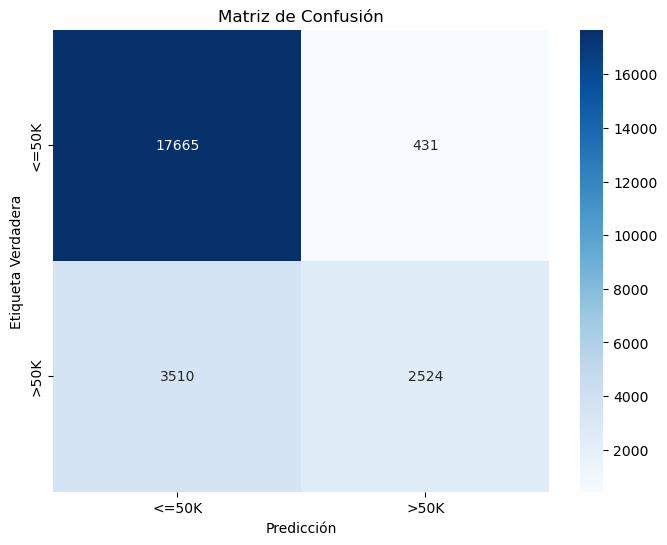

In [38]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [39]:
#medidas de la precisión del modelo en diferentes conjuntos de datos
print('Acurracy de entrenamiento', modeloBosque.score(X_train,y_train))
print('Acurracy de datos de prueba', modeloBosque.score(X_test,y_test))
print('Acurracy de validación (OOBs)', modeloBosque.oob_score_)

Acurracy de entrenamiento 0.8527851458885941
Acurracy de datos de prueba 0.8366763365105677
Acurracy de validación (OOBs) 0.8393567639257294


In [40]:
#analizar cómo varía el rendimiento del modelo en función del número de árboles en el bosque
train_score=[]
oob_score=[]

estimadores=range(50,150,5)

for estimador in estimadores:
    modeloBosque = RandomForestClassifier(n_estimators=estimador,
                                          criterion="gini",
                                          bootstrap=True,
                                          max_features="sqrt",
                                          max_samples=3/4,
                                          oob_score=True,
                                          random_state=42)
    modeloBosque.fit(X_train,y_train)
    train_score.append(modeloBosque.score(X_test,y_test))
    oob_score.append(modeloBosque.oob_score_)

El valor recomendado (numero arboles): 125


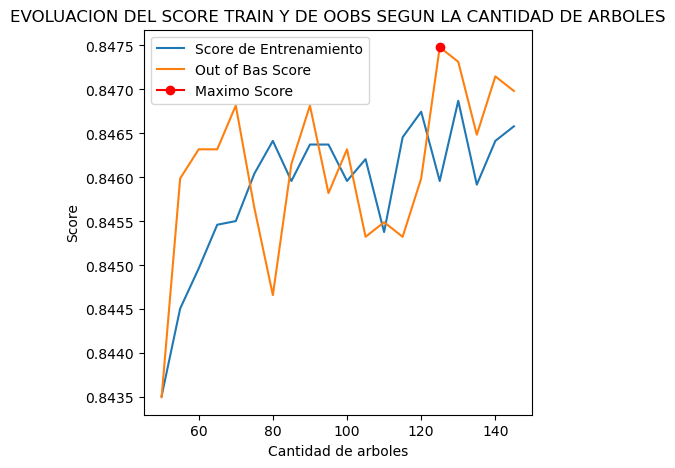

In [41]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(estimadores,train_score,label="Score de Entrenamiento")
ax.plot(estimadores,oob_score,label="Out of Bas Score")
ax.plot(estimadores[np.argmax(oob_score)], max(oob_score), marker="o",color="red",label="Maximo Score")
ax.set_ylabel('Score')
ax.set_xlabel("Cantidad de arboles")
ax.set_title("EVOLUACION DEL SCORE TRAIN Y DE OOBS SEGUN LA CANTIDAD DE ARBOLES")
plt.legend()
print(f"El valor recomendado (numero arboles): {estimadores[np.argmax(oob_score)]}")

In [42]:
#guardar el modelo de bosque en un archivo binario
jb.dump(modeloBosque, "ModeloBosque.bin", compress=True)

['ModeloBosque.bin']

In [43]:
#calcular las importancias de las características del modelo de Bosque Aleatorio
importancia=modeloBosque.feature_importances_

In [44]:
#nombres de las características utilizadas para entrenar el modelo
modeloBosque.feature_names_in_

array(['age', 'workclass', 'education', 'marital.status', 'occupation',
       'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'native.country'], dtype=object)

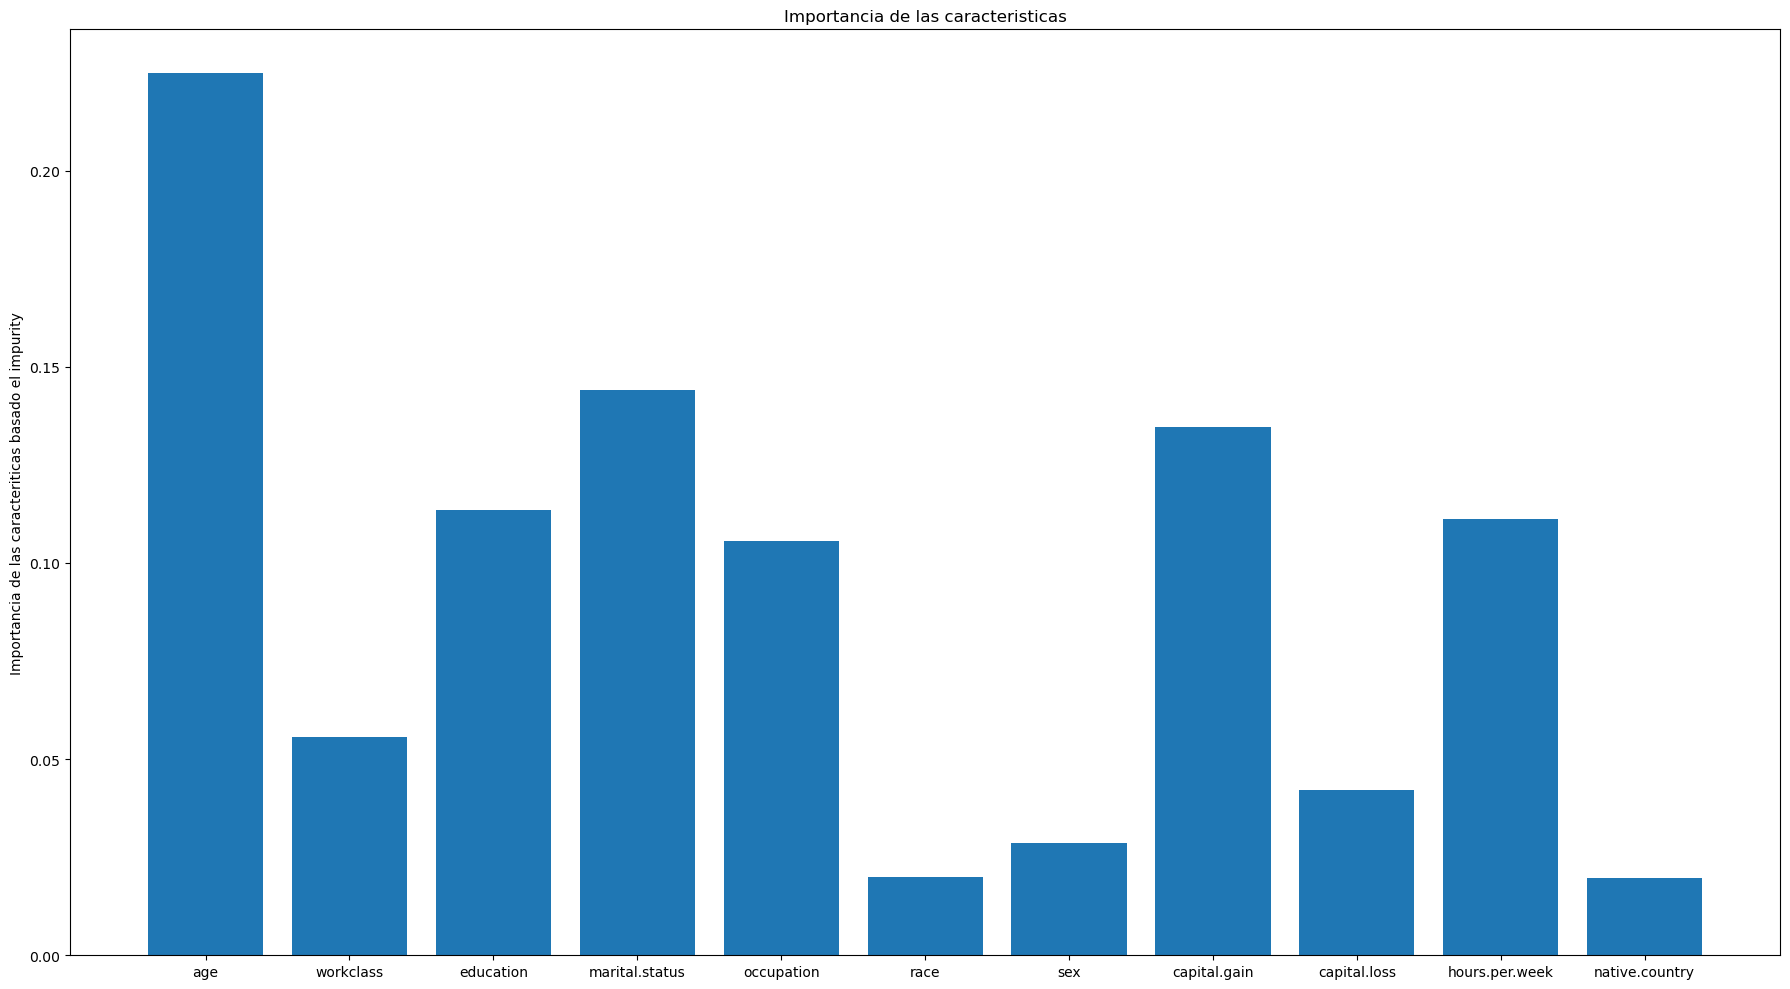

In [45]:
#visualización de la importancia de las características 
features=['age', 'workclass', 'education', 'marital.status', 'occupation',
       'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'native.country']

importancia_pronostico=pd.Series(importancia,index=features)
fig,ax=plt.subplots(figsize=(18,10))
ax.bar(features,importancia)
ax.set_title("Importancia de las caracteristicas")
ax.set_ylabel("Importancia de las caracteriticas basado el impurity")
fig.tight_layout()

Con base en la gráfica, podemos observar que la característica con mayor importancia para el modelo es la edad

In [46]:
##XGBOOST

In [47]:
#instalar el xgboost
!pip install xgboost

In [48]:
import xgboost as xgb

from xgboost import XGBClassifier

In [49]:
# Entrenar el modelo XGBoost
xgb_model = XGBClassifier(n_estimators=20, max_depth=8, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [50]:
#Realizar predicciones en el conjunto de prueba
y_pred_XGB = xgb_model.predict(X_test)

In [51]:
# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_XGB)
print("Precisión del modelo XGBoost:", accuracy)

Precisión del modelo XGBoost: 0.8575217571487774


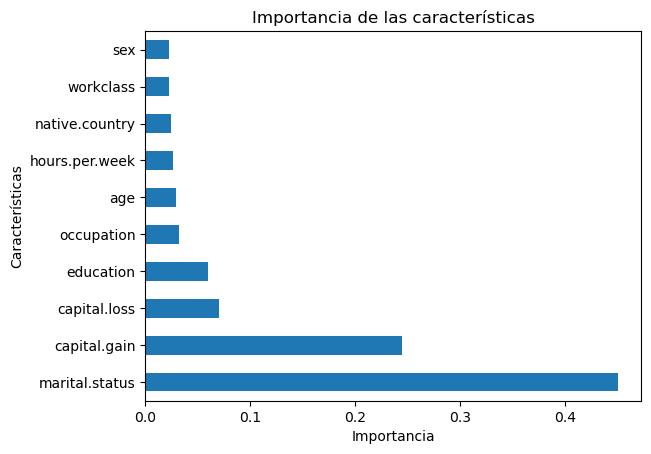

In [52]:
# Visualizaciones
# Importancia de las características
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [53]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred_XGB)
print("Matriz de confusión:")
print(conf_mat)

Matriz de confusión:
[[16937  1159]
 [ 2279  3755]]


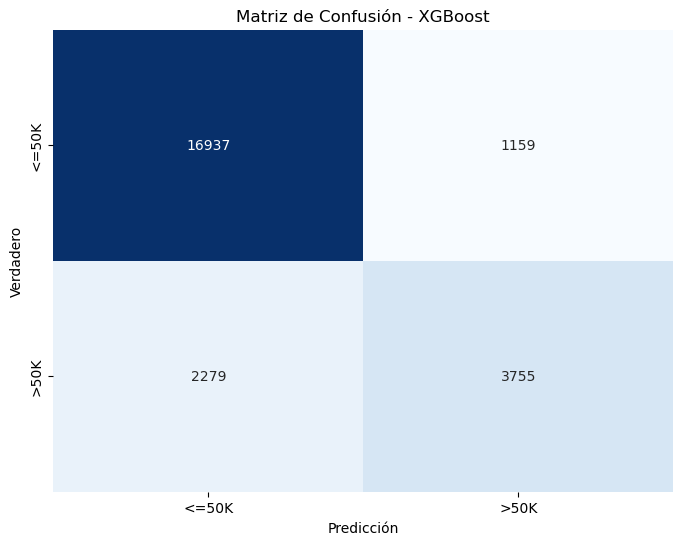

In [54]:
#visualizacion de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - XGBoost')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.xticks([0.5, 1.5], ['<=50K', '>50K'])
plt.yticks([0.5, 1.5], ['<=50K', '>50K'])
plt.show()

In [55]:
#COMPARATIVOS

In [56]:
print("MODELO BOSQUE Y MODELO ARBOL")
print(modeloBosque.score(X_test,y_test),bTree.score(X_test,y_test))

MODELO BOSQUE Y MODELO ARBOL
0.8465810194778284 0.8301284707832574


In [57]:
print("MODELO XGBOOST Y MODELO NAIVE BAYES")
print(xgb_model.score(X_test,y_test),modelNB.score(X_test,y_test))

MODELO XGBOOST Y MODELO NAIVE BAYES
0.8575217571487774 0.788603398259428


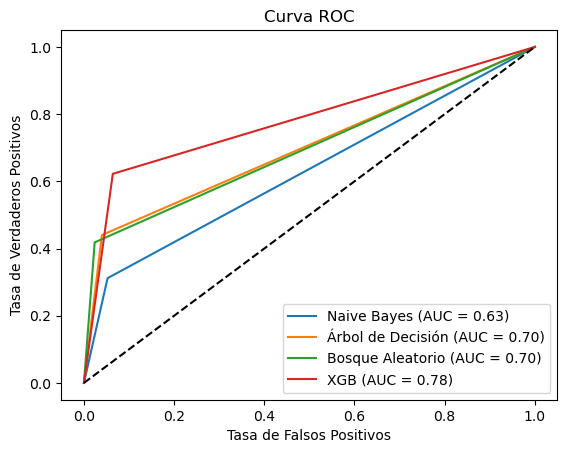

In [60]:
# Calcular las tasas de falsos positivos (FPR) y verdaderos positivos (TPR) para Naive Bayes
fprnb, tprnb, _ = roc_curve(y_test, y_pred_NB)

# Calcular las tasas de falsos positivos (FPR) y verdaderos positivos (TPR) para Árbol de Decisión
fprdt, tprdt, _ = roc_curve(y_test, y_pred_Arbol)

# Calcular las tasas de falsos positivos (FPR) y verdaderos positivos (TPR) para Bosque Aleatorio
fprrf, tprrf, _ = roc_curve(y_test, y_pred_Bosque)

# Calcular las tasas de falsos positivos (FPR) y verdaderos positivos (TPR) para XGB
fprxgb, tprxgb, _ = roc_curve(y_test, y_pred_XGB)


from sklearn.metrics import roc_auc_score

# Calcular el AUC para cada modelo
auc_NB = roc_auc_score(y_test, y_pred_NB)
auc_Arbol = roc_auc_score(y_test, y_pred_Arbol)
auc_Bosque = roc_auc_score(y_test, y_pred_Bosque)
auc_XGB = roc_auc_score(y_test, y_pred_XGB)

# Crear un gráfico que reúna las diferentes curvas ROC
fig, ax = plt.subplots()
ax.plot(fprnb, tprnb, label="Naive Bayes (AUC = {:.2f})".format(auc_NB))
ax.plot(fprdt, tprdt, label="Árbol de Decisión (AUC = {:.2f})".format(auc_Arbol))
ax.plot(fprrf, tprrf, label="Bosque Aleatorio (AUC = {:.2f})".format(auc_Bosque))
ax.plot(fprxgb, tprxgb, label="XGB (AUC = {:.2f})".format(auc_XGB))


# Línea diagonal
ax.plot([0, 1], [0, 1], linestyle='--', color='black')

# Etiquetas y título
ax.set_xlabel("Tasa de Falsos Positivos")
ax.set_ylabel("Tasa de Verdaderos Positivos")
ax.set_title("Curva ROC")
ax.legend()

plt.show()

En este caso, para realizar la predicción correspondiente a si una persona va a ganar más o menos de 50K, el modelo más adecuado es el de XGBOOST, seguido del modelo de bosque aleatorio, pues son los que presentan un mejor rendimiento y muy cercano entre si. La precisión ofrecida por el modelo Naive Bayes en este caso presenta una precisión demasiado baja, por lo cual no es muy confiable respecto a los demás. 

Por otra parte, si bien el modelo de arbol de decisión presenta un rendimiento cercano al modelo de bosque aleatorio, se realiza con un parámetro de max_depht bastante elevado, lo que puede ser causante de sobreajuste. Esto lo hace poco fiable para realizar la predicción respecto al salario de los individuos.


Además, podemos observar que por lo general, la variable a la que se da más importancia en los modelos es al estado civil (marital.status). Esto nos indica que puede ser la más influyente en el resultado de que un individuo gane más o menos de 50K..